## Evaluation

In [13]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, RocCurveDisplay

import sys
from pathlib import Path

project_root = Path.cwd().parents[0]
sys.path.append(str(project_root))

from src.features.feature_engineering import feature_engineering
from src.utils.split_data import split_data

In [15]:
DATA_PATH = '/Users/erik/Documents/GitHub/customer-churn-prediction/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
MODELS_PATH = '/Users/erik/Documents/GitHub/customer-churn-prediction/outputs/models'

In [ ]:
models = {
    "Random Forest": joblib.load(MODELS_PATH + "/random_forest_tuned.pkl"),
    "XGBoost": joblib.load(MODELS_PATH + "/xgboost_tuned.pkl"),
    "SVM": joblib.load(MODELS_PATH + "/support_vector_machine_tuned.pkl")
}

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.6.0 when using version 1.5.1. This might lead to 

In [18]:
df = pd.read_csv(DATA_PATH)

X, y = feature_engineering(df)

X_train, X_test, y_train, y_test = split_data(X,y)


 Random Forest
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



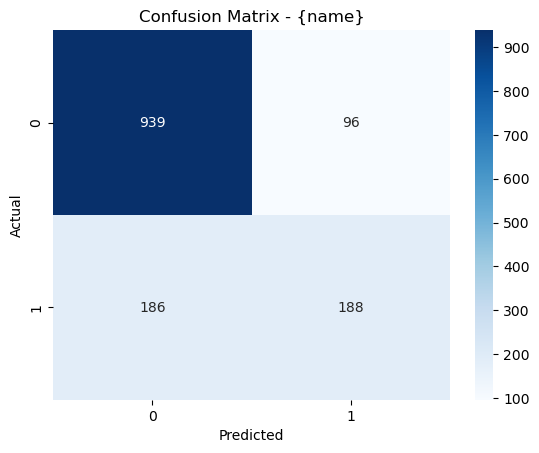


 XGBoost
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



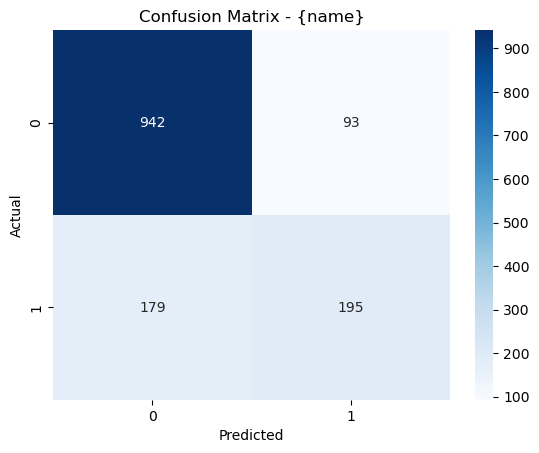


 SVM
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.71      1409
weighted avg       0.78      0.79      0.78      1409



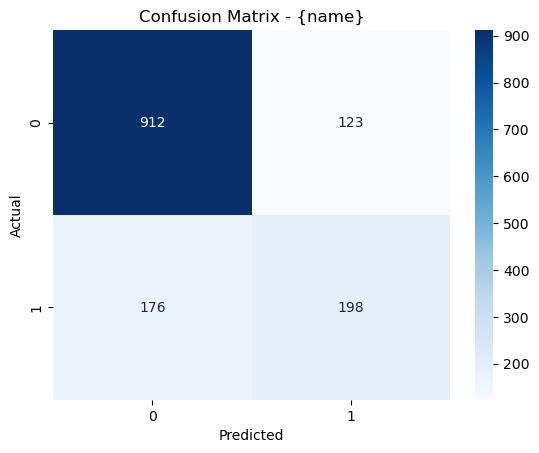

In [21]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) if hasattr(model, "predict_proba") else None

    print(f'\n {name}')
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title('Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    results.append({"Model": name, "F1-score": f1, "ROC AUC": roc})

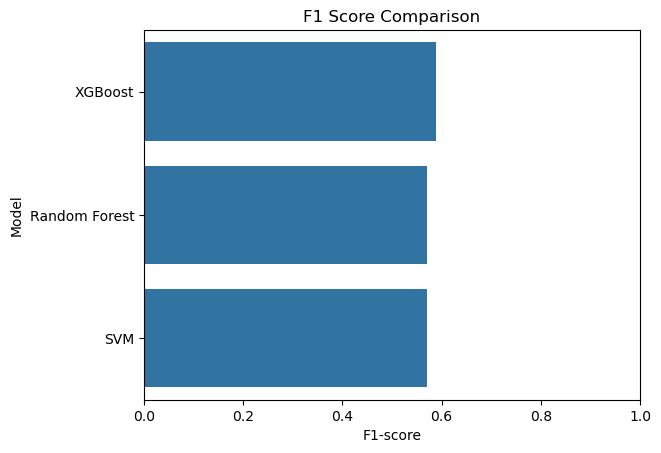

In [25]:
f1_score = pd.DataFrame(results).sort_values("F1-score", ascending=False)
sns.barplot(data=f1_score, x="F1-score", y="Model")
plt.title("F1 Score Comparison")
plt.xlim(0, 1)
plt.show()

<Figure size 800x600 with 0 Axes>

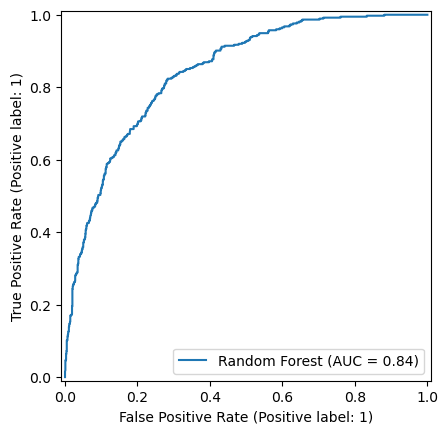

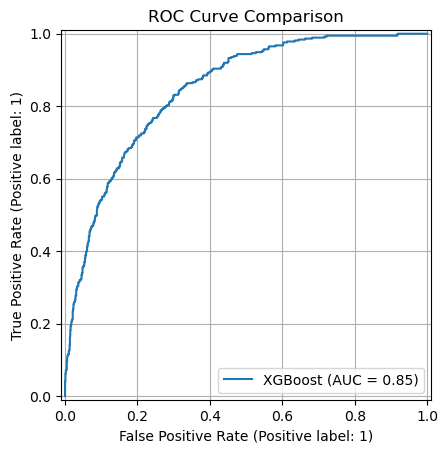

In [26]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()